In [1]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math
from pickle import dump
from sklearn.preprocessing import MinMaxScaler
from pandas_profiling import ProfileReport
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline

In [2]:
import codigo
from codigo import utils
from codigo import model_utils

# Carga del conjunto de datos inicial

In [3]:
df_Inicial = pd.read_csv(r'dataset/FreeStyle.csv')

# Vista previa del conjunto de datos

In [4]:
df_Inicial.head()

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0


In [5]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000001 entries, 0 to 3000000
Data columns (total 3 columns):
 #   Column         Dtype  
---  ------         -----  
 0   ID             object 
 1   Date           object 
 2   Glucose level  float64
dtypes: float64(1), object(2)
memory usage: 68.7+ MB


# Ajuste de tipos de datos

In [6]:
df_Inicial['Date']=pd.to_datetime(df_Inicial['Date'])

In [7]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000001 entries, 0 to 3000000
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.7+ MB


In [8]:
df_Inicial['Date'].min()

Timestamp('2016-10-05 08:47:00')

In [9]:
df_Inicial['Date'].max()

Timestamp('2044-03-22 03:44:00')

# Limpieza del conjunto de datos

## Elimininamos los registros duplicados por paciente y fecha

In [10]:
df_Inicial=df_Inicial.drop_duplicates(['ID','Date'],keep='first')
df_Inicial.reset_index(drop=True, inplace=True)

In [11]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2997002 entries, 0 to 2997001
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 68.6+ MB


## Seleccionamos el rango de fechas validas

In [12]:
DateStart='2018-01-06';
df_depurado=df_Inicial[df_Inicial['Date'] >=DateStart]
df_depurado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2967499 entries, 0 to 2997001
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 90.6+ MB


In [13]:
DateEnd='2022-03-21';
df_depurado=df_depurado[df_depurado['Date'] <=DateEnd]
df_depurado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2966685 entries, 0 to 2997001
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 90.5+ MB


In [14]:
df_depurado.describe()

,Glucose level
count,2.966685e+06
mean,1.579769e+02
std,6.577485e+01
min,4.000000e+01
25%,1.090000e+02
50%,1.470000e+02
75%,1.960000e+02
max,5.000000e+02


In [15]:
df=df_depurado

In [16]:
df['Date'].min()

Timestamp('2018-01-06 00:31:00')

In [17]:
df['Date'].max()

Timestamp('2022-03-20 23:58:00')

In [18]:
df.to_csv('dataset/generado/datasetDepurado.csv', index=False) 

In [19]:
df_Inicial = df

In [20]:
df_Inicial.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2966685 entries, 0 to 2997001
Data columns (total 3 columns):
 #   Column         Dtype         
---  ------         -----         
 0   ID             object        
 1   Date           datetime64[ns]
 2   Glucose level  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 90.5+ MB


## Detección y tratamiento de datos faltantes

### Analizamos los datos de 1 paciente con las muestras ordenadas cada 15 min

In [21]:
pacienteID="LIB193277"
paciente = utils.getDataPatient(df,pacienteID,'15min')
paciente

,Glucose level
Date,
2018-06-12 20:15:00,156.0
2018-06-12 20:30:00,163.0
2018-06-12 20:45:00,158.0
2018-06-12 21:00:00,167.0
2018-06-12 21:15:00,139.0
...,...
2022-03-18 10:45:00,153.0
2022-03-18 11:00:00,144.0
2022-03-18 11:15:00,134.0


Realizamos un análisis exploratorio

In [22]:
profile = ProfileReport(paciente, title="Pandas Profiling Report",
    missing_diagrams=None,
    correlations=None, interactions=None,samples=None)
profile.to_file("analisisExploratorio/analisis_paciente_ID_LIB193277.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
paciente_Null=paciente.isnull()
paciente_Null.sum()

Glucose level    17736
dtype: int64

Se observa que no todos los registros fueron tomados cada 15 min, y existen datos faltantes

In [24]:
paciente_Null.tail()

,Glucose level
Date,
2022-03-18 10:45:00,False
2022-03-18 11:00:00,False
2022-03-18 11:15:00,False
2022-03-18 11:30:00,False
2022-03-18 11:45:00,False


<AxesSubplot: xlabel='Date'>

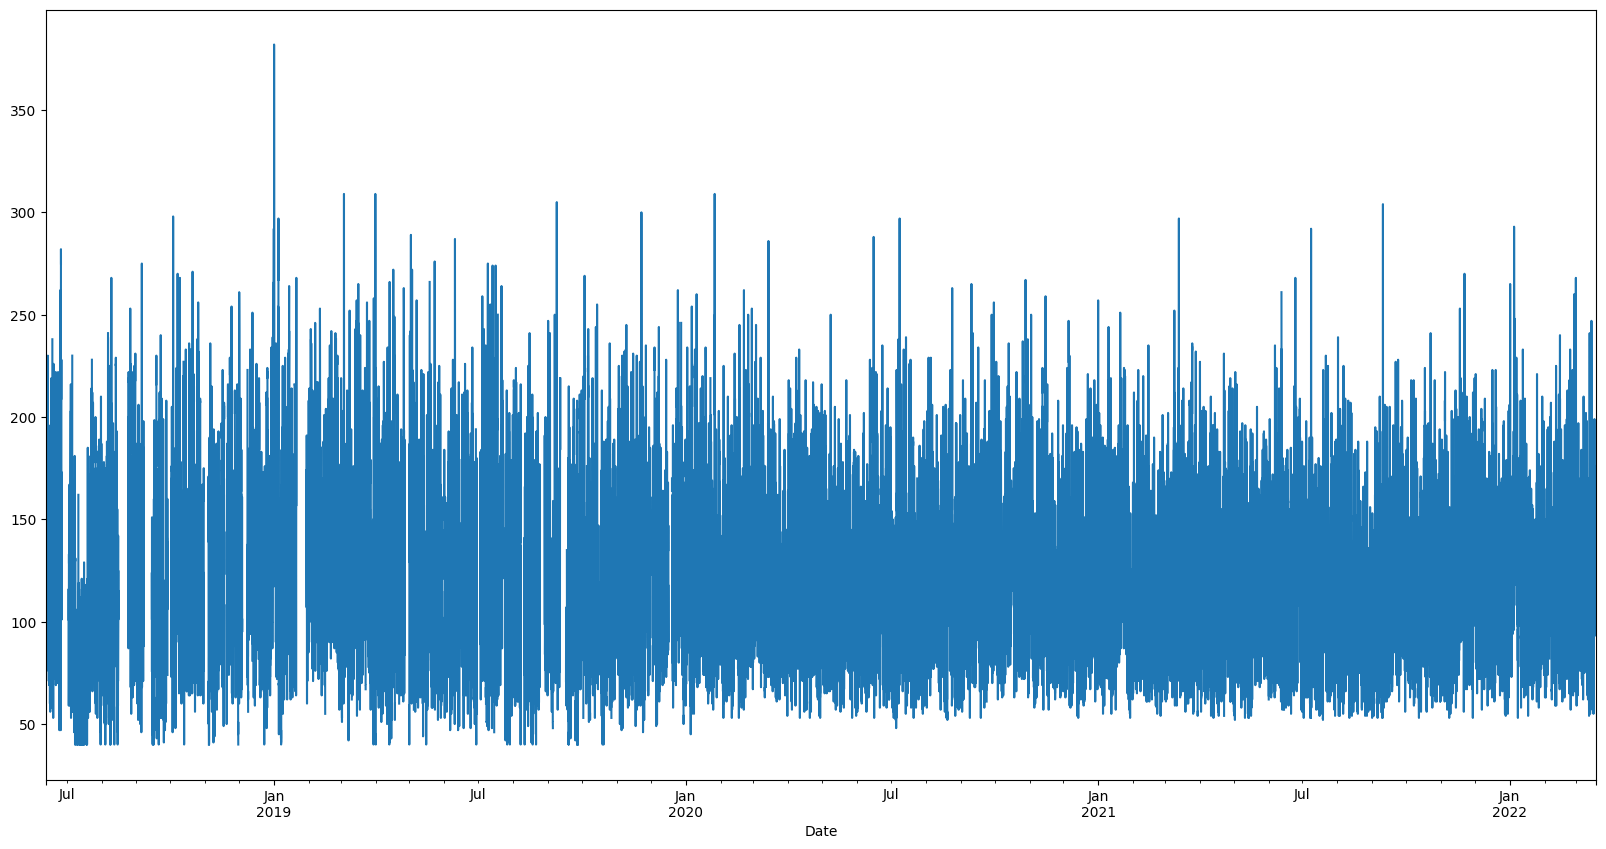

In [25]:
paciente['Glucose level'].plot(figsize=(20, 10))

<AxesSubplot: >

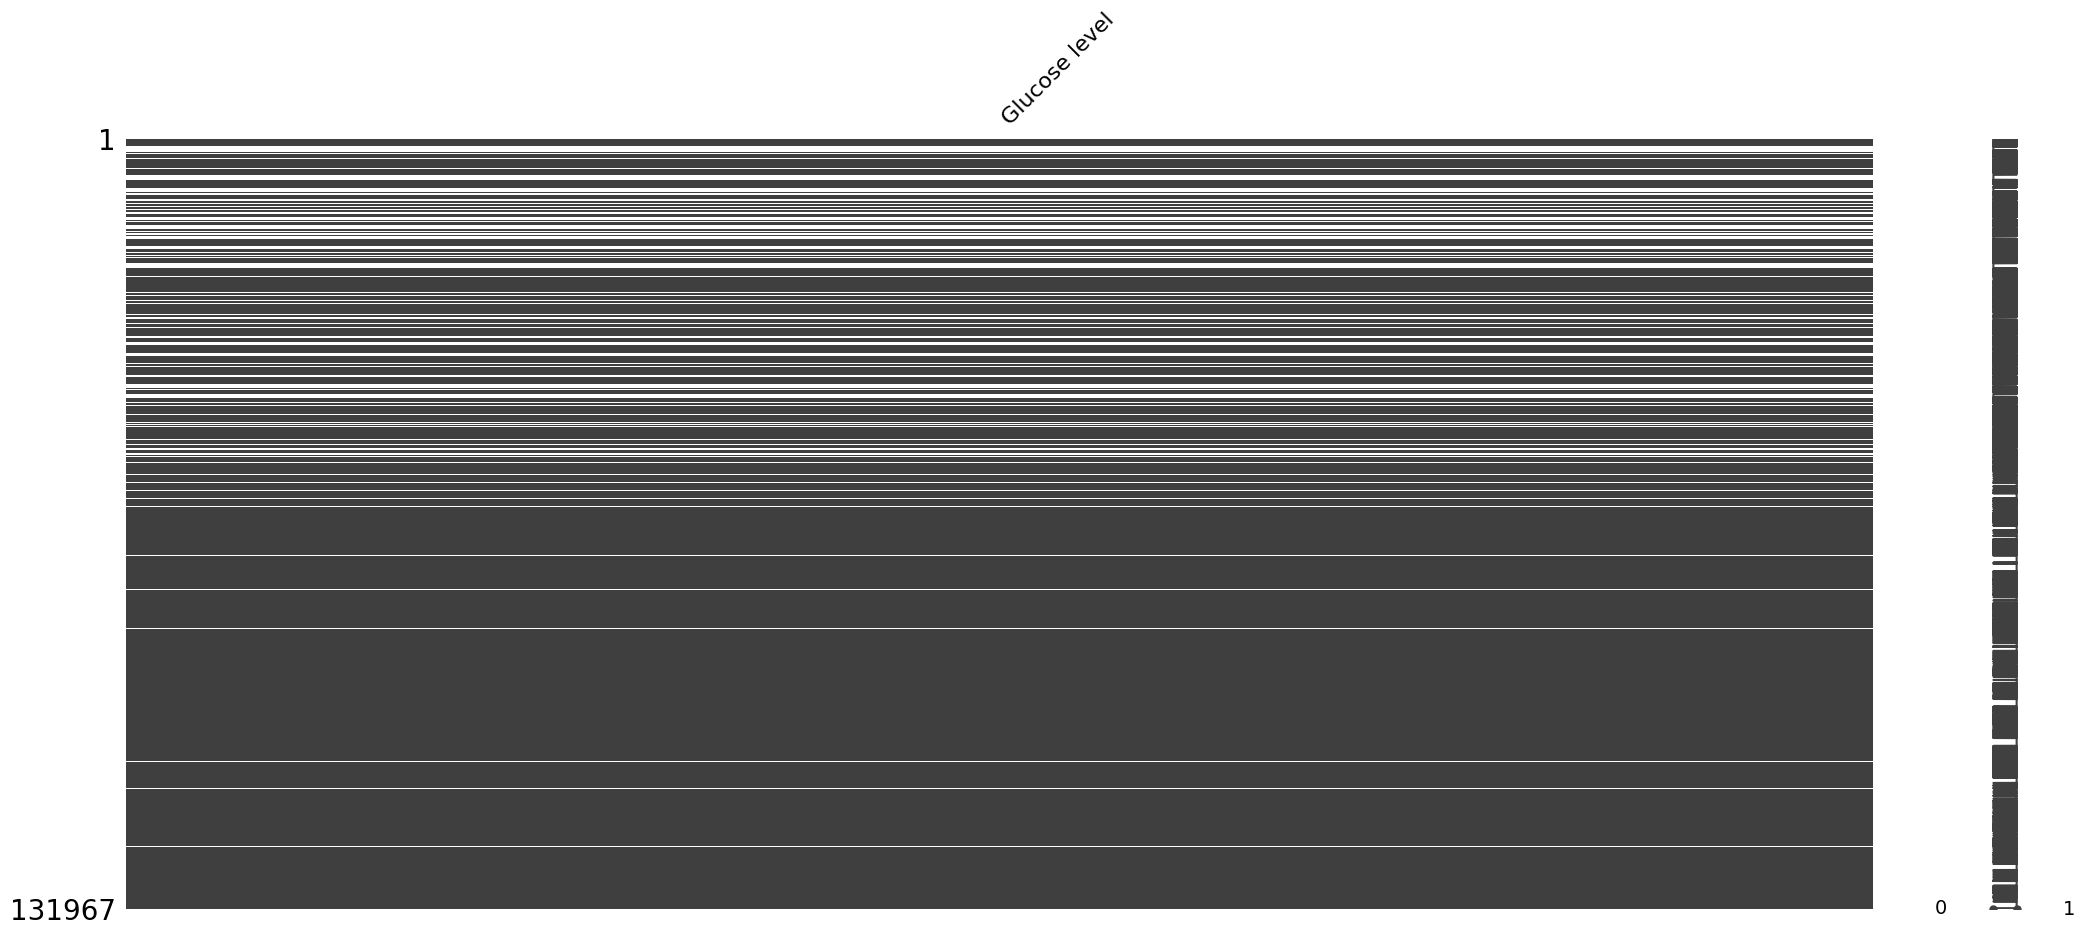

In [26]:
import missingno as msno
msno.matrix(paciente)

### Estrategia de reemplazo de datos faltantes

In [27]:
ObjRangeDateStart='2020-6-12';
ObjRangeDateEnd='2020-6-25';

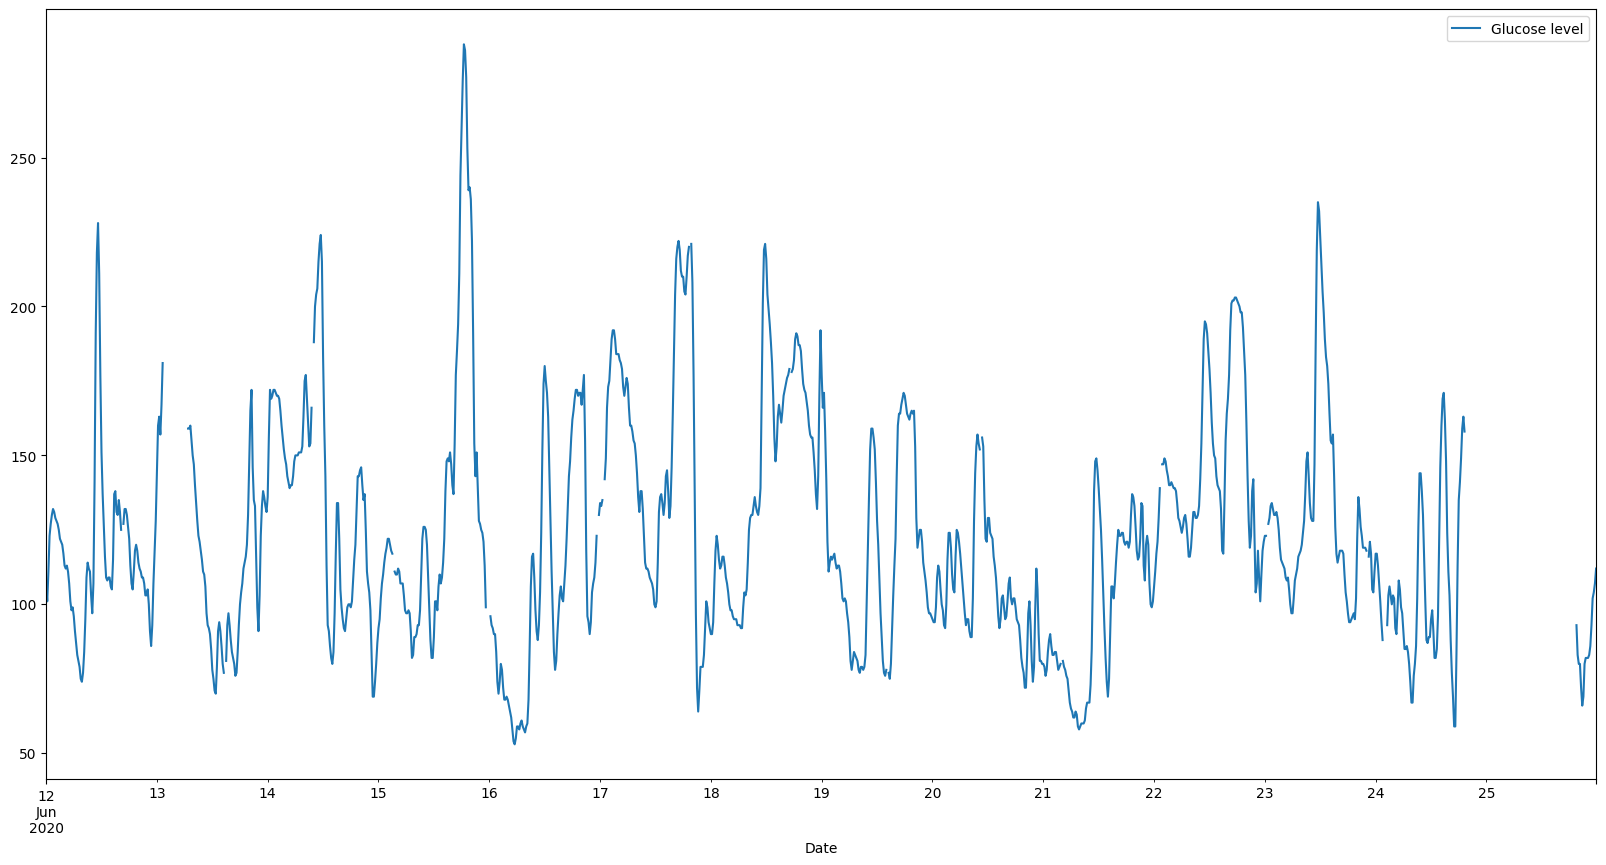

In [28]:
utils.plotRangeDates(paciente,ObjRangeDateStart,ObjRangeDateEnd)

Intentar usar -1 como valor por defecto para datos faltantes

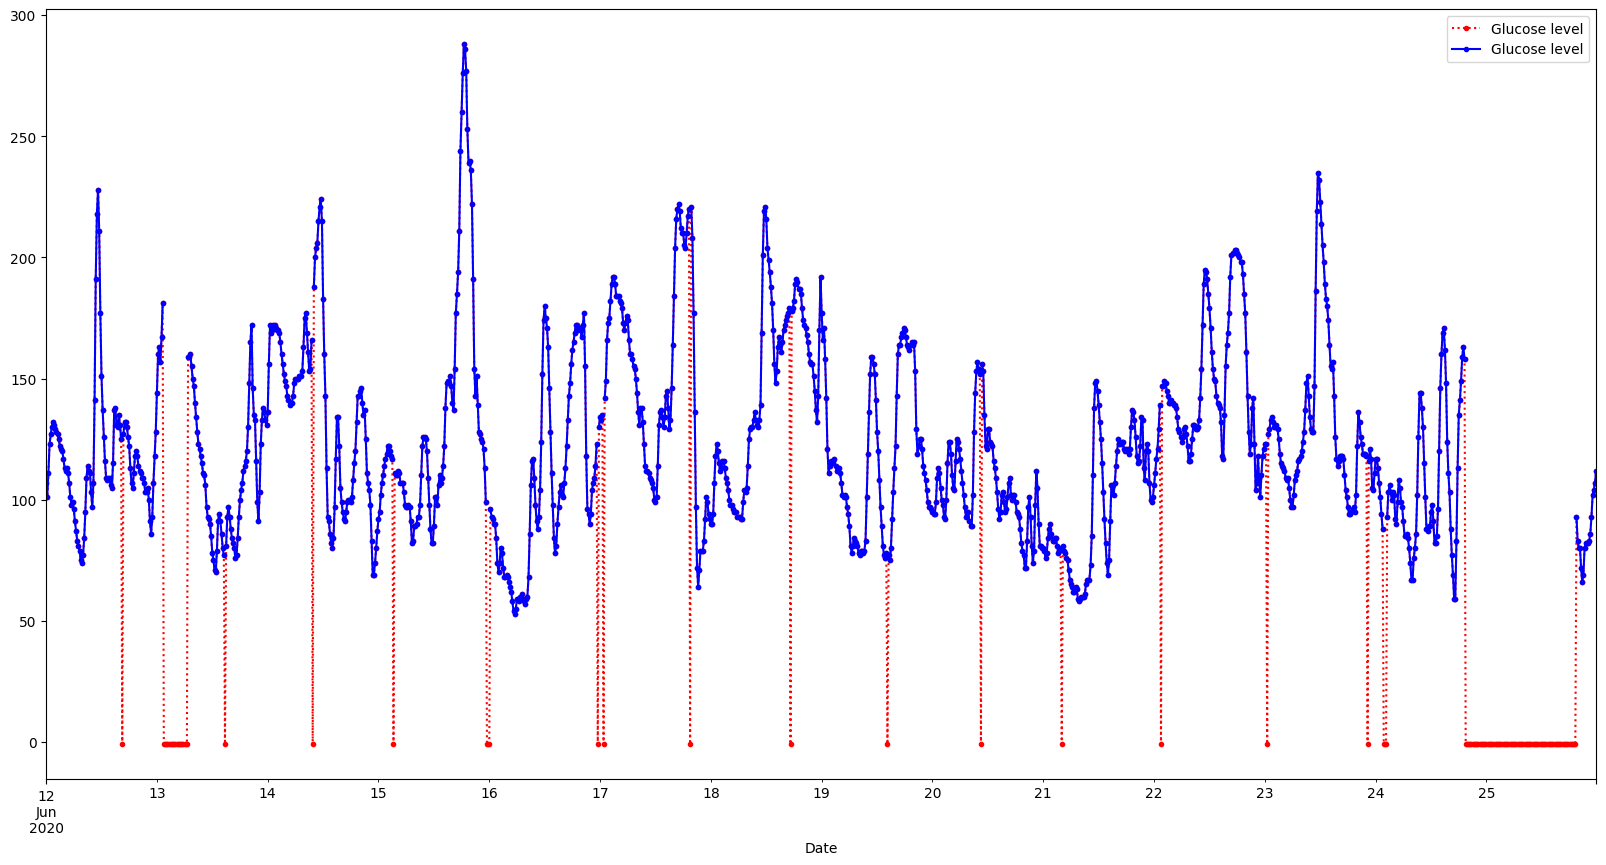

In [29]:
paciente_fill=utils.fillNullData(paciente,'-1')
utils.plotTwoDf(paciente_fill,paciente,ObjRangeDateStart,ObjRangeDateEnd)

ffill reemplaza los valores faltantes con el valor de la muestra anterior

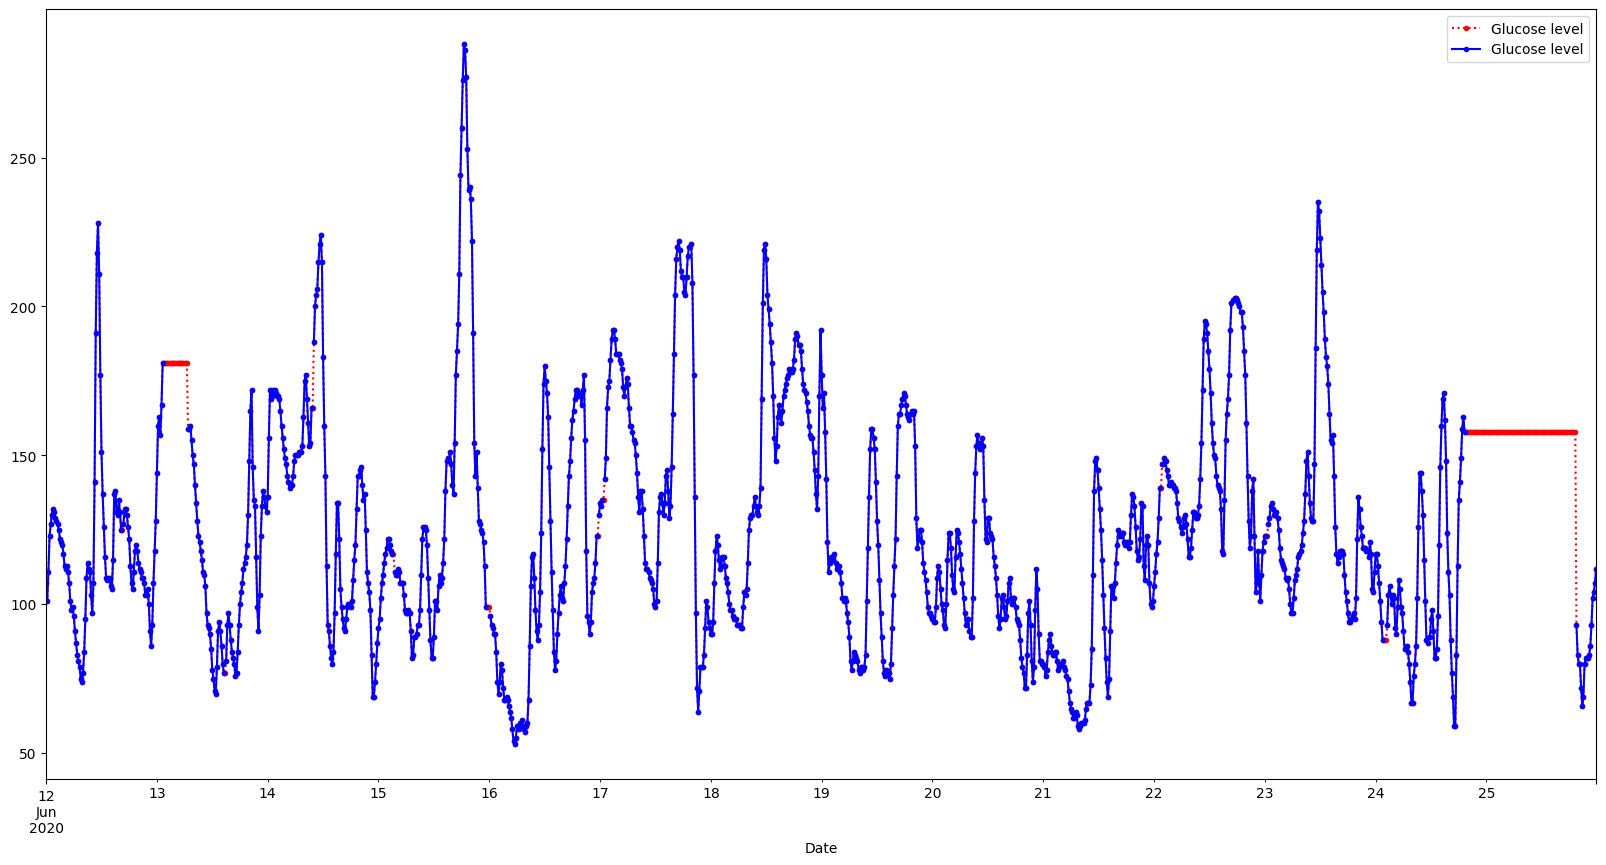

In [30]:
paciente_fill=utils.fillNullData(paciente,'ffill')
utils.plotTwoDf(paciente_fill,paciente,ObjRangeDateStart,ObjRangeDateEnd)

bfill reemplaza los valores faltantes con el valor de la muestra siguiente

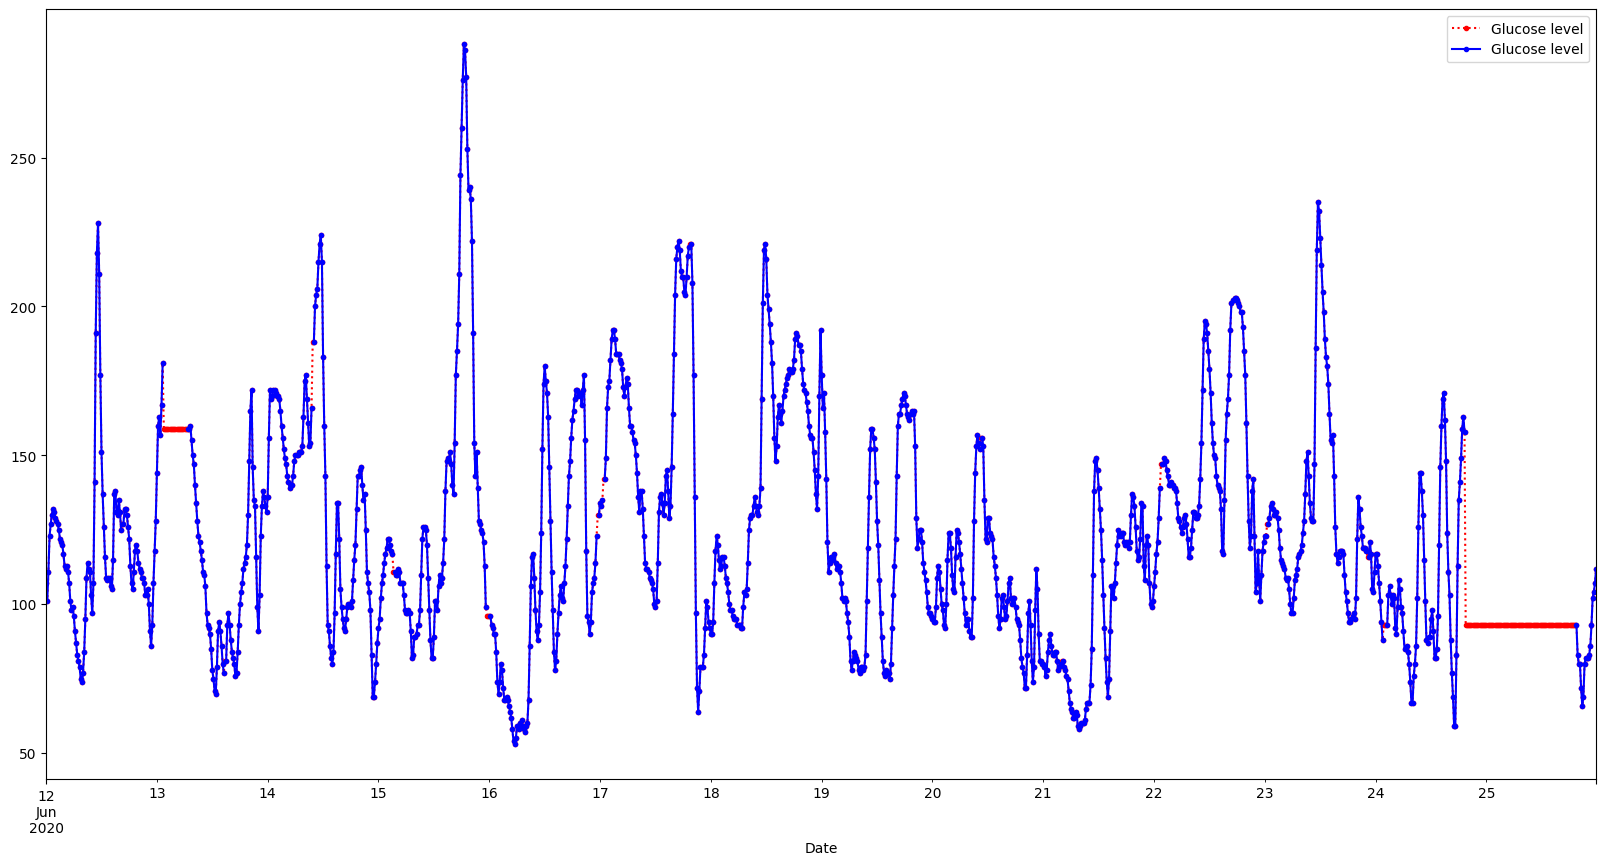

In [31]:
paciente_fill=utils.fillNullData(paciente,'bfill')
utils.plotTwoDf(paciente_fill,paciente,ObjRangeDateStart,ObjRangeDateEnd)

interpolate_linear reemplaza los valores faltantes con un valor que pasa por la linea entre 2 puntos datos

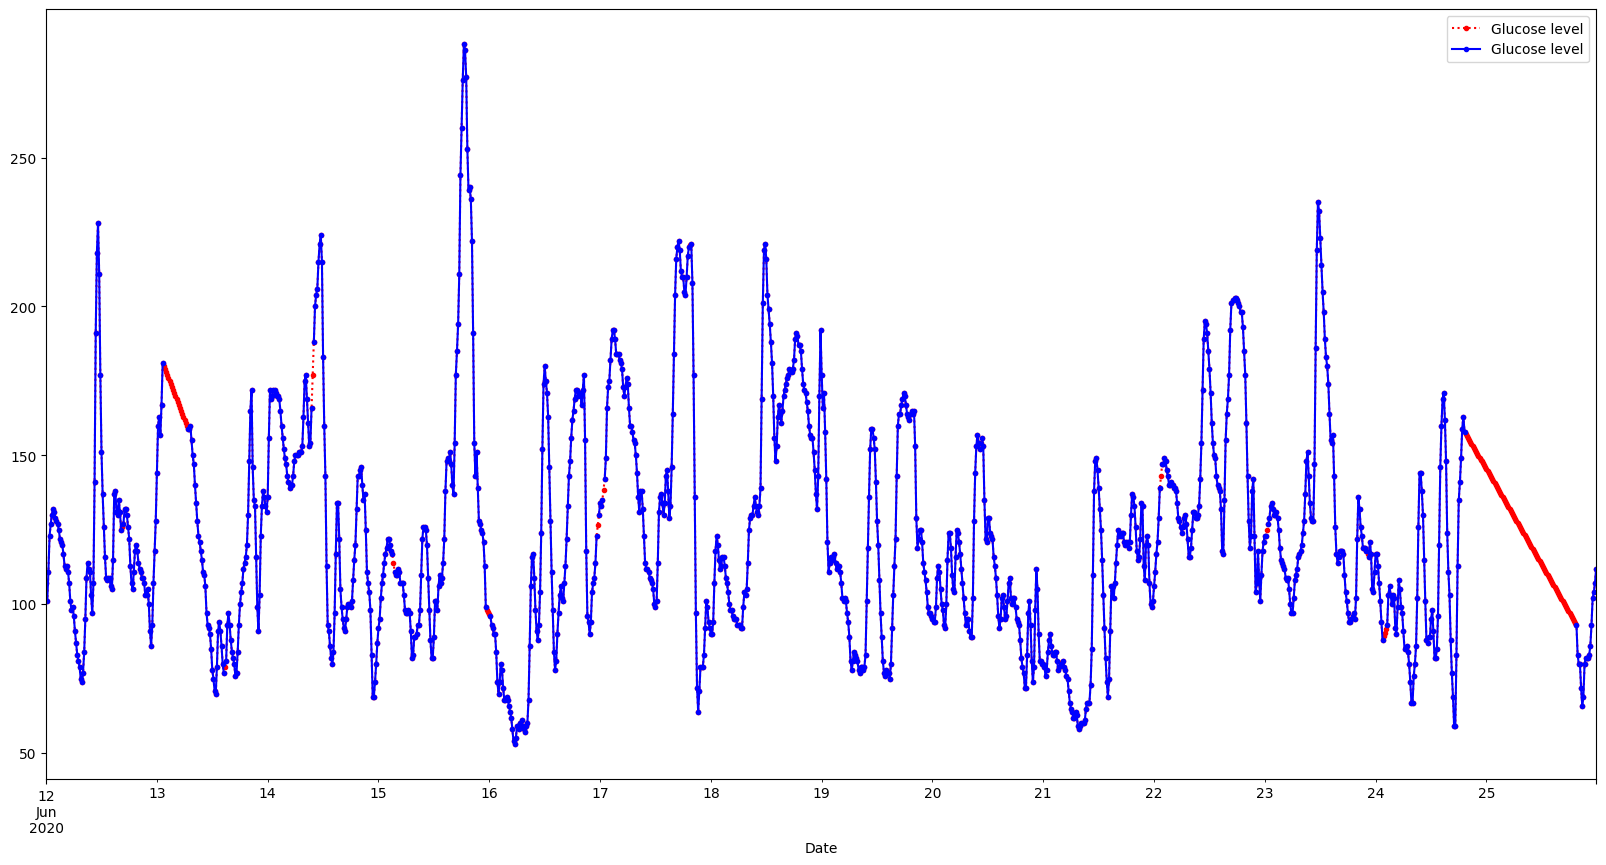

In [32]:
paciente_fill=utils.fillNullData(paciente,'interpolate_linear')
utils.plotTwoDf(paciente_fill,paciente,ObjRangeDateStart,ObjRangeDateEnd)

In [33]:
paciente_fill_Null=paciente_fill.isnull()
paciente_fill_Null.sum()

Glucose level    0
dtype: int64

###	Normalización de los datos

En este paso solo vamos a entrenar los normalizadores que vamos a utilizar, luego integraremos todos los pasos en una función general

#### Entrenamiento para datos de glucosa

In [34]:
df['Glucose level'].head()

0    99.0
1    92.0
2    86.0
3    85.0
4    85.0
Name: Glucose level, dtype: float64

In [35]:
scalerGlucosa = MinMaxScaler(feature_range=(0,1))

df[['Glucose level']]=scalerGlucosa.fit_transform(df[['Glucose level']].values)
dump(scalerGlucosa, open('dataset/generado/scalerGlucosa.scaler', 'wb'))

In [36]:
df

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,0.128261
1,LIB193263,2020-06-09 19:23:00,0.113043
2,LIB193263,2020-06-09 19:38:00,0.100000
3,LIB193263,2020-06-09 19:53:00,0.097826
4,LIB193263,2020-06-09 20:08:00,0.097826
...,...,...,...
2996997,LIB193399,2020-10-20 20:50:00,0.093478
2996998,LIB193399,2020-10-20 21:05:00,0.078261
2996999,LIB193399,2020-10-20 21:20:00,0.058696
2997000,LIB193399,2020-10-20 21:35:00,0.050000


In [37]:
df[['Glucose level']]=scalerGlucosa.inverse_transform(df[['Glucose level']].values)

In [38]:
df

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0
...,...,...,...
2996997,LIB193399,2020-10-20 20:50:00,83.0
2996998,LIB193399,2020-10-20 21:05:00,76.0
2996999,LIB193399,2020-10-20 21:20:00,67.0
2997000,LIB193399,2020-10-20 21:35:00,63.0


#### Entrenamiento para datos de horas

In [39]:
arrayHours=[]
for i in range(24):
    arrayHours.append(i)


dfHours= pd.DataFrame(arrayHours)
dfHours.columns = ['hours']
dfHours

,hours
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [40]:
scalerHours = MinMaxScaler()

arrayHours=scalerHours.fit_transform(dfHours[['hours']].values)
dump(scalerHours, open('dataset/generado/scalerHours.scaler', 'wb'))
arrayHours

array([[0.        ],
       [0.04347826],
       [0.08695652],
       [0.13043478],
       [0.17391304],
       [0.2173913 ],
       [0.26086957],
       [0.30434783],
       [0.34782609],
       [0.39130435],
       [0.43478261],
       [0.47826087],
       [0.52173913],
       [0.56521739],
       [0.60869565],
       [0.65217391],
       [0.69565217],
       [0.73913043],
       [0.7826087 ],
       [0.82608696],
       [0.86956522],
       [0.91304348],
       [0.95652174],
       [1.        ]])

In [41]:
arrayHoursT=scalerHours.inverse_transform([[1]])
arrayHoursT[0]

array([23.])

#### Entrenamiento para datos de minutos

In [42]:
arrayMins=[]
for i in range(60):
    arrayMins.append(i)


dfMins= pd.DataFrame(arrayMins)
dfMins.columns = ['mins']
dfMins

,mins
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7
8,8
9,9


In [43]:
scalerMin = MinMaxScaler()

arrayMins=scalerMin.fit_transform(dfMins[['mins']].values)
dump(scalerMin, open('dataset/generado/scalerMin.scaler', 'wb'))
arrayMins

array([[0.        ],
       [0.01694915],
       [0.03389831],
       [0.05084746],
       [0.06779661],
       [0.08474576],
       [0.10169492],
       [0.11864407],
       [0.13559322],
       [0.15254237],
       [0.16949153],
       [0.18644068],
       [0.20338983],
       [0.22033898],
       [0.23728814],
       [0.25423729],
       [0.27118644],
       [0.28813559],
       [0.30508475],
       [0.3220339 ],
       [0.33898305],
       [0.3559322 ],
       [0.37288136],
       [0.38983051],
       [0.40677966],
       [0.42372881],
       [0.44067797],
       [0.45762712],
       [0.47457627],
       [0.49152542],
       [0.50847458],
       [0.52542373],
       [0.54237288],
       [0.55932203],
       [0.57627119],
       [0.59322034],
       [0.61016949],
       [0.62711864],
       [0.6440678 ],
       [0.66101695],
       [0.6779661 ],
       [0.69491525],
       [0.71186441],
       [0.72881356],
       [0.74576271],
       [0.76271186],
       [0.77966102],
       [0.796

In [44]:
arrayMinT=scalerMin.inverse_transform([[1]])
arrayMinT[0]

array([59.])

#### Entrenamiento para datos de partes del día

In [45]:
arrayPod=[]
for i in range(6):
    arrayPod.append(i+1)


dfPod= pd.DataFrame(arrayPod)
dfPod.columns = ['podid']
dfPod

,podid
0,1
1,2
2,3
3,4
4,5
5,6


In [46]:
scalerPodId = MinMaxScaler()

arrayPod=scalerPodId.fit_transform(dfPod[['podid']].values)
dump(scalerPodId, open('dataset/generado/scalerPodId.scaler', 'wb'))
arrayPod

array([[0. ],
       [0.2],
       [0.4],
       [0.6],
       [0.8],
       [1. ]])

In [47]:
arrayPodT=scalerPodId.inverse_transform([[0.6]])
arrayPodT[0]

array([4.])

#### Entrenamiento para datos de niveles de glucosa

In [48]:
arrayLevel=[-1,0,1]
dfLevel= pd.DataFrame(arrayLevel)
dfLevel.columns = ['levelid']
dfLevel

,levelid
0,-1
1,0
2,1


In [49]:
scalerLevelId = MinMaxScaler()

arrayLevel=scalerLevelId.fit_transform(dfLevel[['levelid']].values)
dump(scalerLevelId, open('dataset/generado/scalerLevelId.scaler', 'wb'))
arrayLevel

array([[0. ],
       [0.5],
       [1. ]])

In [50]:
arrayLevelT=scalerLevelId.inverse_transform([[0.5]])
arrayLevelT[0]

array([0.])

### Ingeniería de características

In [51]:
df

,ID,Date,Glucose level
0,LIB193263,2020-06-09 19:08:00,99.0
1,LIB193263,2020-06-09 19:23:00,92.0
2,LIB193263,2020-06-09 19:38:00,86.0
3,LIB193263,2020-06-09 19:53:00,85.0
4,LIB193263,2020-06-09 20:08:00,85.0
...,...,...,...
2996997,LIB193399,2020-10-20 20:50:00,83.0
2996998,LIB193399,2020-10-20 21:05:00,76.0
2996999,LIB193399,2020-10-20 21:20:00,67.0
2997000,LIB193399,2020-10-20 21:35:00,63.0


In [52]:
paciente_data = utils.getDataPatient(df,pacienteID,'15min',False)

In [53]:
paciente_data

,Glucose level
Date,
2018-06-12 20:15:00,156.0
2018-06-12 20:30:00,163.0
2018-06-12 20:45:00,158.0
2018-06-12 21:00:00,167.0
2018-06-12 21:15:00,139.0
...,...
2022-03-18 10:45:00,153.0
2022-03-18 11:00:00,144.0
2022-03-18 11:15:00,134.0


In [54]:
paciente_data=utils.generateNewColumns(paciente_data,scalerLevelId,scalerHours,scalerMin,scalerPodId,scalerGlucosa,True)

In [55]:
paciente_data

,Glucose level,level_label,level_id,hour,min,pod_label,pod_id
Date,,,,,,,
2018-06-12 20:15:00,0.252174,euglycemia,0.5,0.869565,0.254237,Eve,0.6
2018-06-12 20:30:00,0.267391,euglycemia,0.5,0.869565,0.508475,Eve,0.6
2018-06-12 20:45:00,0.256522,euglycemia,0.5,0.869565,0.762712,Eve,0.6
2018-06-12 21:00:00,0.276087,euglycemia,0.5,0.913043,0.000000,Night,0.8
2018-06-12 21:15:00,0.215217,euglycemia,0.5,0.913043,0.254237,Night,0.8
...,...,...,...,...,...,...,...
2022-03-18 10:45:00,0.245652,euglycemia,0.5,0.434783,0.762712,Morning,0.2
2022-03-18 11:00:00,0.226087,euglycemia,0.5,0.478261,0.000000,Morning,0.2
2022-03-18 11:15:00,0.204348,euglycemia,0.5,0.478261,0.254237,Morning,0.2
